In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='./drive/MyDrive/data/'
train_filename='train_bike_sharing_demand.csv'
test_filename='test_bike_sharing_demand.csv'

In [3]:
import pandas as pd
import os
train = pd.read_csv(os.path.join(file_path, train_filename))
test= pd.read_csv(os.path.join(file_path, test_filename))

In [4]:
train.head()
#casual 미등록 사용자 대여 시작한 수
#registered 등록 사용자 대여 시작한 수
#count총 대여 수

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 데이터 확인
- 아불싸, barplot은 ~.mean()을 구한것과 같다고 함. sum()이 아님

### na값 없음

In [6]:
train.info()
#날짜를 제외한 나머지 정수 혹은 부동소수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
train['datetime'] = pd.to_datetime(train['datetime'])

### 범주형변수

In [9]:
train.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

<Axes: xlabel='season', ylabel='count'>

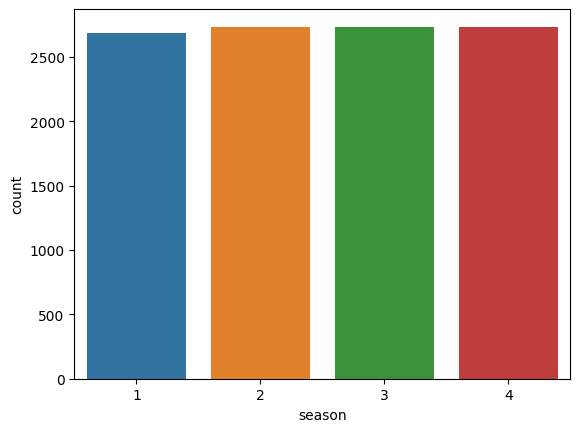

In [10]:
import seaborn as sns
sns.countplot(x='season',data=train)

<Axes: xlabel='season', ylabel='count'>

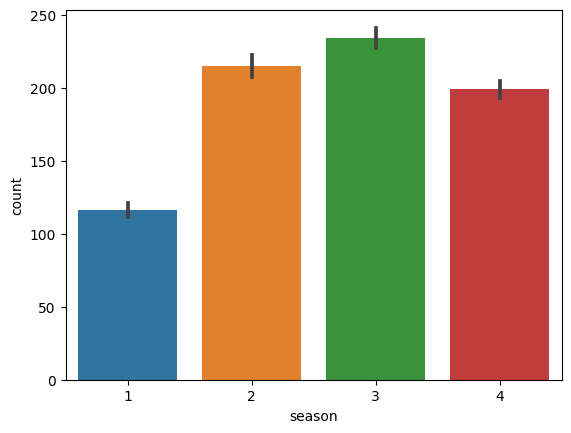

In [11]:
sns.barplot(data=train, x='season', y='count')
#season 계절 1= spring, 2=summer 3=fall 4=winter

<Axes: xlabel='season'>

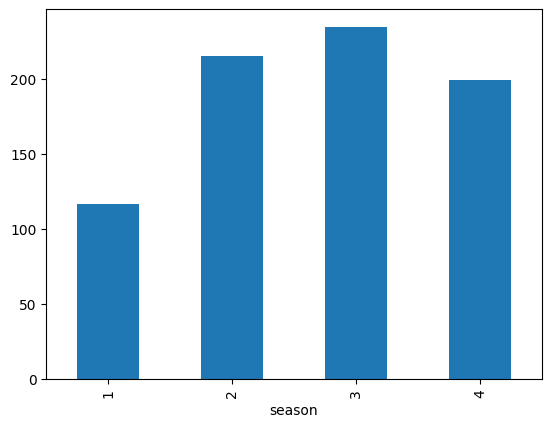

In [14]:
train.groupby('season')['count'].mean().plot.bar()

<Axes: xlabel='holiday', ylabel='count'>

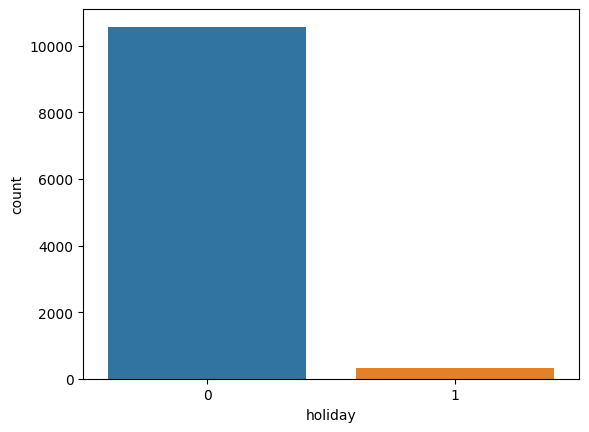

In [ ]:
sns.countplot(x='holiday',data=train)

<Axes: xlabel='holiday', ylabel='count'>

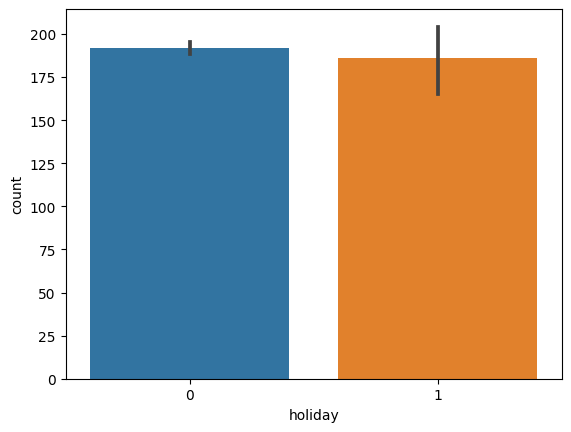

In [ ]:
sns.barplot(data=train, x='holiday', y='count')
#holiday 0,1 #boolean

<Axes: xlabel='holiday'>

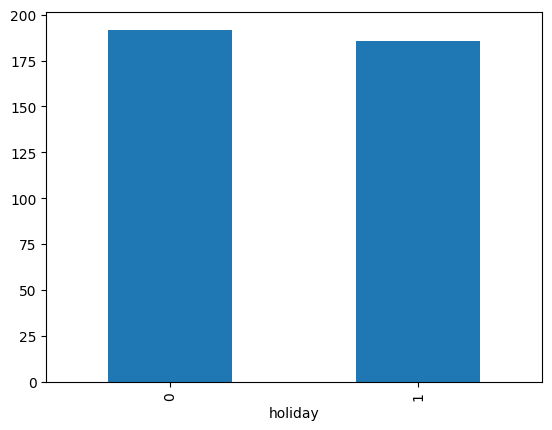

In [18]:
train.groupby('holiday')['count'].mean().plot.bar()

<Axes: xlabel='workingday', ylabel='count'>

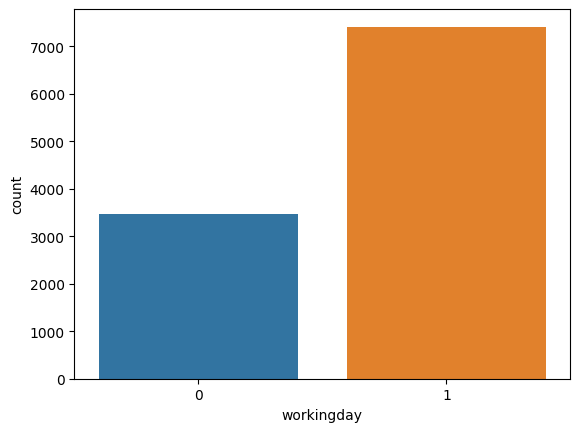

In [ ]:
sns.countplot(x='workingday', data=train)

<Axes: xlabel='workingday', ylabel='count'>

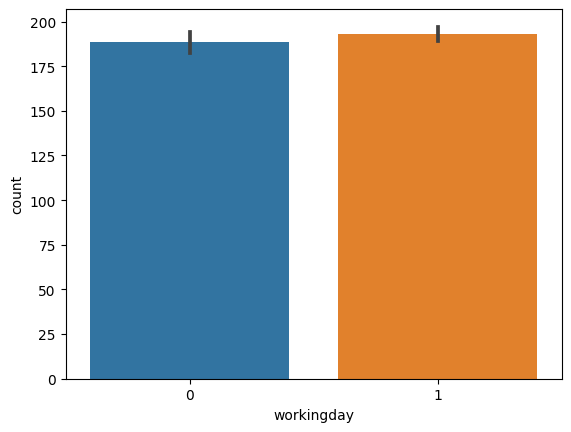

In [ ]:
sns.barplot(data=train, x='workingday', y='count')
#workingday 0,1 근무일인사람과 아닌사람 #boolean

<Axes: xlabel='weather', ylabel='count'>

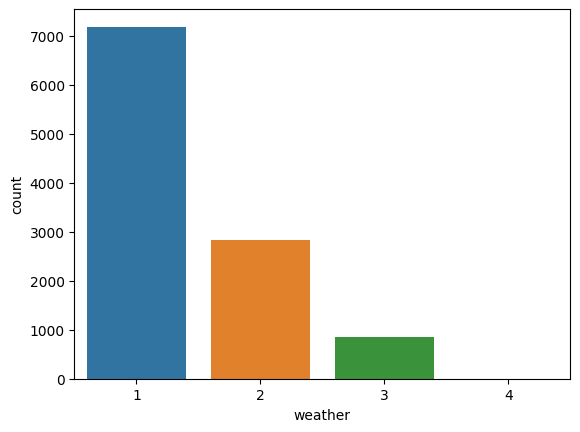

In [ ]:
sns.countplot(x='weather', data=train)

<Axes: xlabel='weather', ylabel='count'>

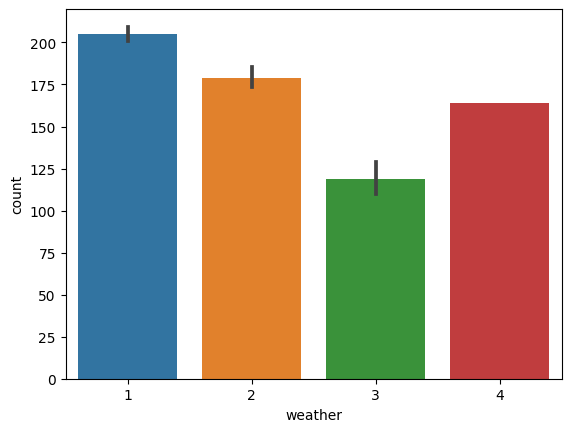

In [ ]:
sns.barplot(data=train, x='weather', y='count')
#weather 1:맑음, 약간 구름, 부분적으로 구름 2. 안개 + 구름, 안개+부서진 구름, 안개+약간 구름, 안개
#3: 가벼운 눈, 약한 비 + 뇌우 + 흩어진 구름, 약한비 + 흩어진 구름 4: 폭우+얼음+뇌우+안개, 눈+안

In [ ]:
#(주의)barplot(x,y)는 mean() 값임.sum()이 아님
#계절별 데이터셋 수는 비슷하지만, 가을에 평균 대여수가 가장 많고, 봄일때 평균대여수가 가장 적은 경향을 보인다.
#휴일인 날이 소수지만 휴일인 날에 대여한 자전거 수와 휴일이 아닌 날에 대여한 자전거 수가 유사하다.
# 즉, 휴일에 대부분 대여가 이루어지고 있음을 알 수 있다.
# 데이터에 날씨가 맑거나 약간의 구름이 있는 정도의 데이터가 2/3정도 차지하고
# 폭우+얼음+안개+뇌우같이 날씨가 매우 안좋은 날의 데이터가 매우 소수이지만
#오히려 날씨가 안좋은 날에 대여한 평균 자전거 수가 다른 날의 평균 대여수 합의 1/4만큼 차지할정도로 많이 이용한다.

In [ ]:
train = train.astype({'season':str, 'holiday':str,'workingday':str,'weather': str})

### 숫자형 변수

In [ ]:
train.iloc[:,5:].describe()
#temp : 섭씨온도
#atemp : 섭씨온도
#humidity : 상대습도
#windspeed : 풍속

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='humidity', ylabel='count'>

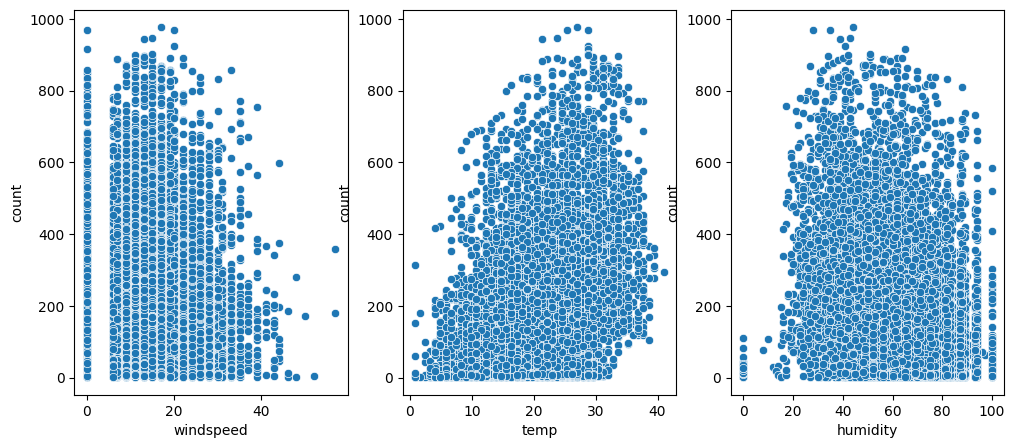

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)
#windspeed가 특정 값 아래는 없는데 0값은 또 많은 상황을 볼 수 있다. 의심적다면 의심스럽다.
#그러나, 풍속에 대한 지식을 알기 어려우므로 그대로 두고 진행하겠다.

<Axes: xlabel='temp'>

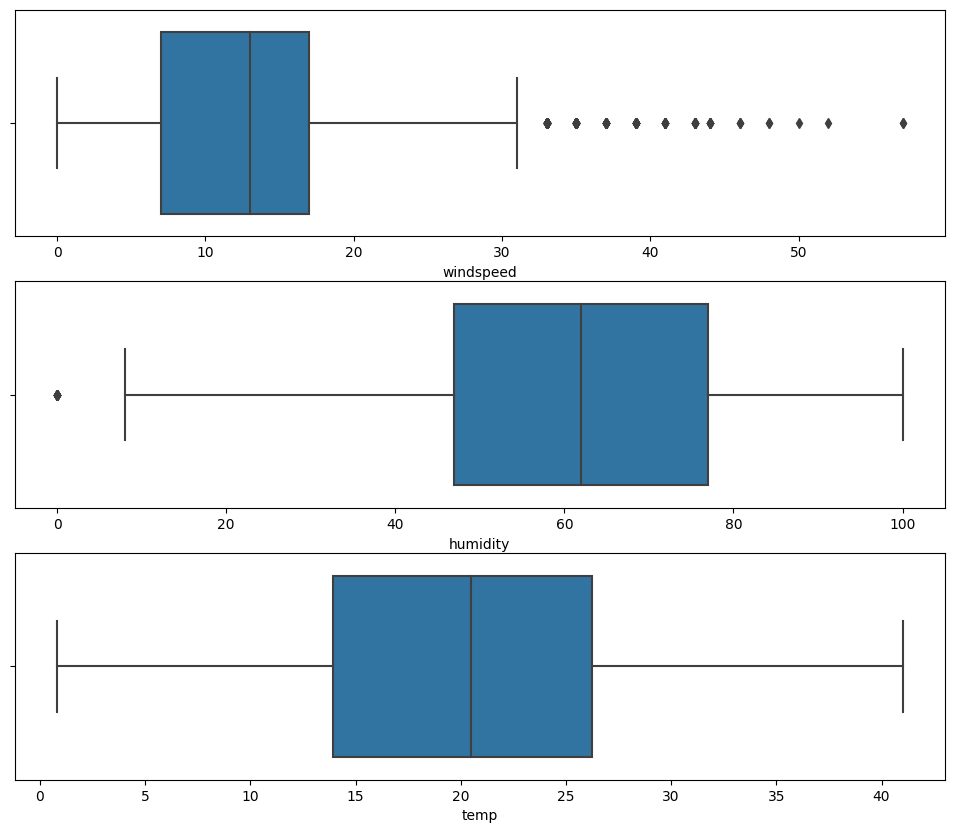

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
# 바람,습도, 온도 값을 살펴봤을 때, 기상이변 등등 자연의 힘으로 가능한 범위 하에 있다고 판단되므로 이상치 처리는 건너띄도록 하겠다.

<ipython-input-55-b93d258e6640>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

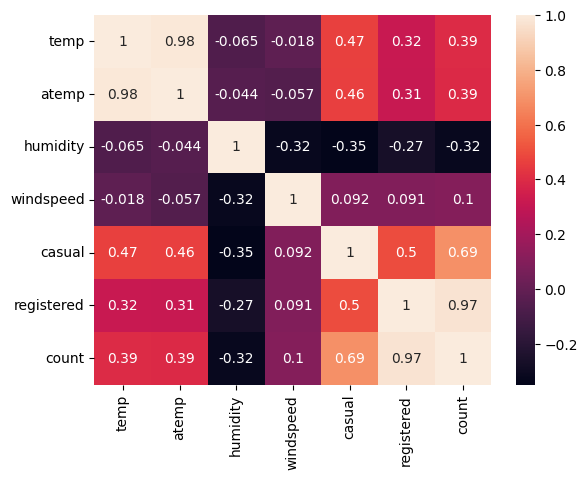

In [ ]:
sns.heatmap(train.corr(), annot=True)

### 시간형 변수

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
# dayofweek 는 요일을 가져오는 말
#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
train['dayofweek'] = train['datetime'].dt.dayofweek

<Axes: xlabel='year', ylabel='count'>

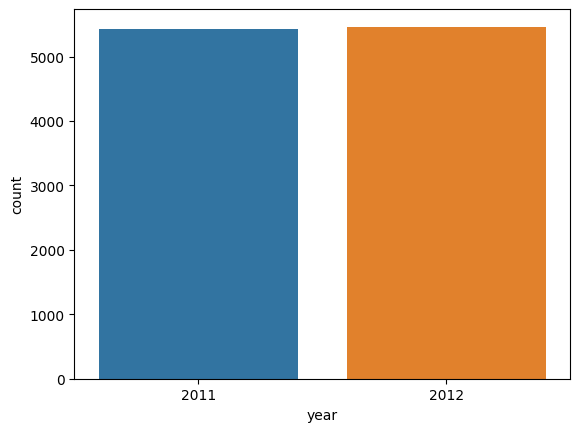

In [ ]:
sns.countplot(data=train, x='year')

<Axes: xlabel='year', ylabel='count'>

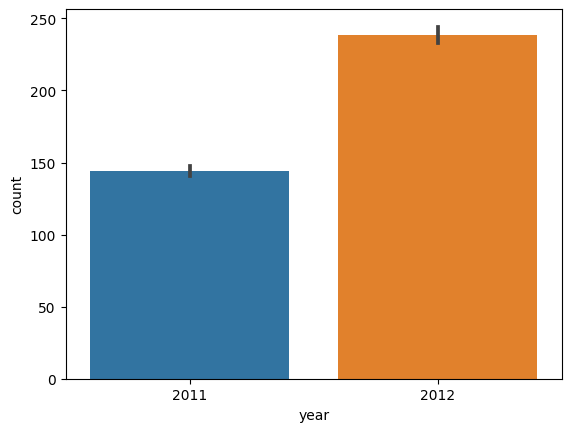

In [ ]:
sns.barplot(data=train, x='year', y='count')

<Axes: xlabel='month', ylabel='count'>

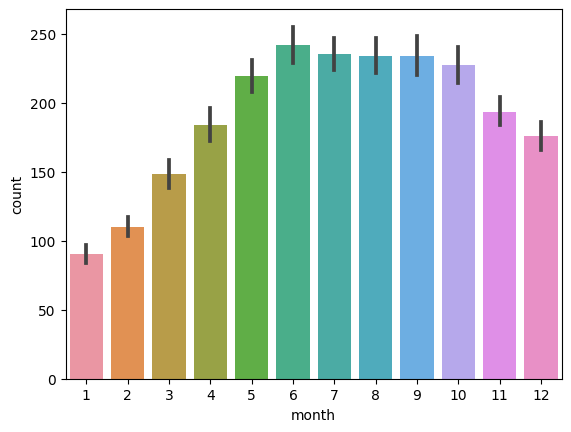

In [ ]:
sns.barplot(data=train, x='month', y='count')

<Axes: xlabel='hour', ylabel='count'>

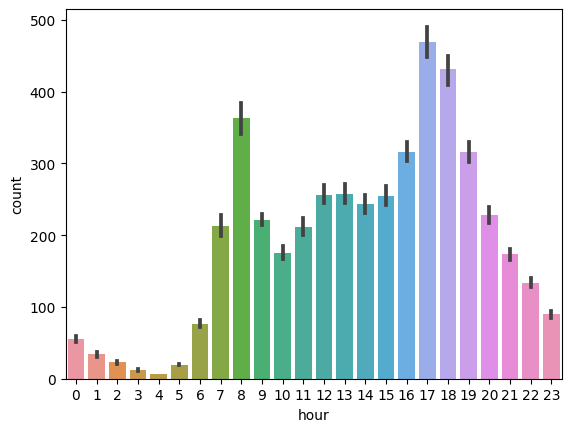

In [ ]:
sns.barplot(data=train, x='hour', y='count')

<Axes: xlabel='hour', ylabel='count'>

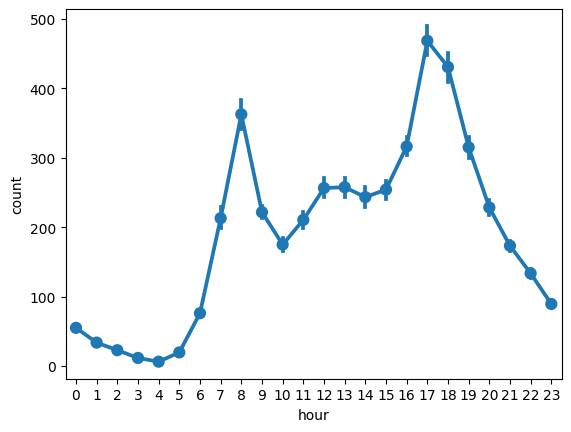

In [ ]:
plt.subplot(1,1,1) # nrows=1, ncols=1, index=1
sns.pointplot(data=train, x='hour', y='count')

<Axes: xlabel='hour', ylabel='count'>

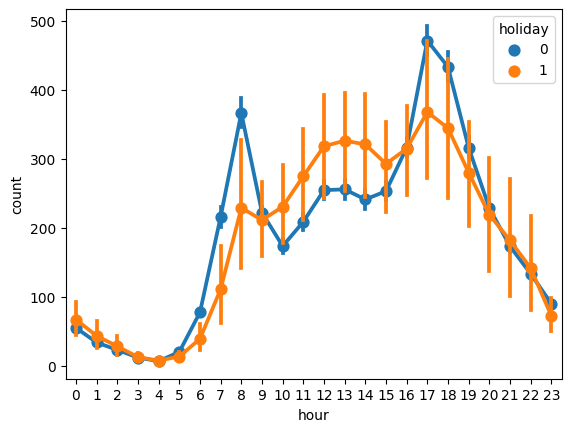

In [ ]:
sns.pointplot(data=train, x='hour', y='count', hue='holiday')

<Axes: xlabel='hour', ylabel='count'>

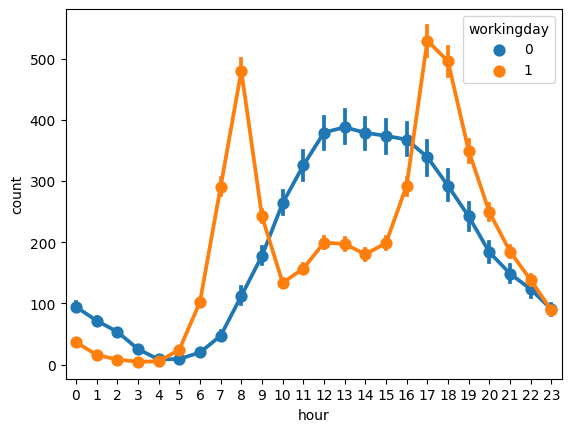

In [ ]:
sns.pointplot(data=train, x='hour', y='count', hue='workingday')

<Axes: xlabel='hour', ylabel='count'>

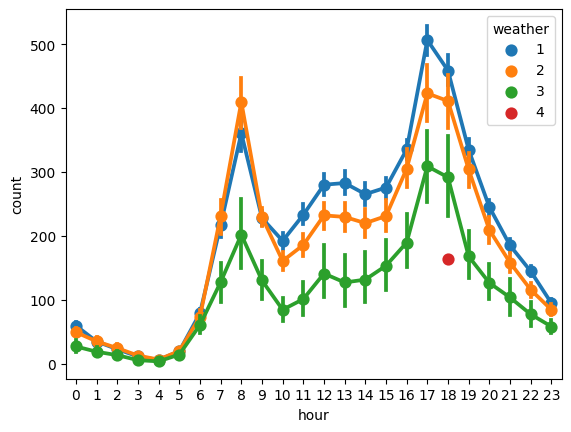

In [ ]:
sns.pointplot(data=train, x='hour', y='count', hue='weather')

<Axes: xlabel='hour', ylabel='count'>

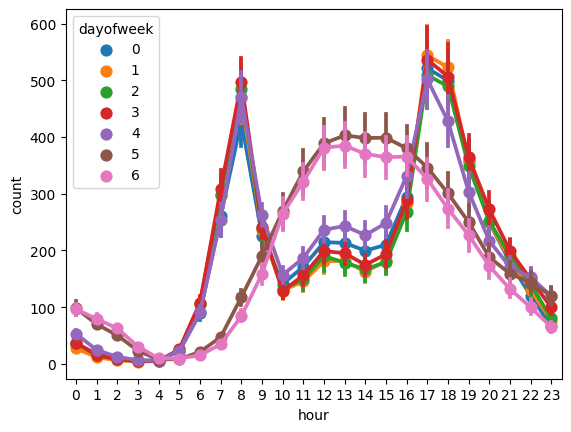

In [ ]:
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')
#5: 토 6: 일

In [ ]:
#2011,2012년 해당 데이터 수는 유사하지만, 2011년 대비 2012년 자전거 평균 대여수가 약 1.7배 증가하였다.
#대여가 가장 많은 상위 5달은 6월~10월이다.
#가장 대여가 많은 시간대는 오전에는 8시~9시 사이, 오후에는 16시~19시 사이로, 출퇴근시간에 가장 수요가 많은 것으로 확인된다.
#그러나, 직장인과 비직장인을 따져보았을 때, 근무자는 7시~9시, 16시~19시에 가장 많이 자전거를 대여하지만,
#비근무자는 12시~16시 사이에 가장 많이 대여하여 근무일의 여부에 따라 큰 패턴의 차이를 보인다.
#이는, 주말과 주말이 아닌 요일의 패턴의 차이와 동일하다.
#계절별로큰 패턴의 차이는 있지 않으나, 여름 출근시간대에 자전거를 대여하는 평균 수가 다른 계절 대비 상대적으로 더 높은 경향이 있다.

### 종속변수 확인 # log scaling
- 수연님 말씀하시기로는 정규분포를 로그로 치환해서 예측하는 방법이 통계학적으로 많이 사용하는 방법이라고 함.
- 단, 조금만 예측이 틀려져도 실제 로그 치환 전의 값을 np.exp(예측값) 은 커질 수 있다는 단점이 있음.
- 그렇다면 결국 count_log 예측하는 모델 성능은 count_log 값으로 평가하되, count_log를 예측하는 모델 과 count를 예측하는 모델도 생성하고 count 값으로 성능 비교해 더 좋은 모델을 선택하는 것이 맞다는 생각이 듦.

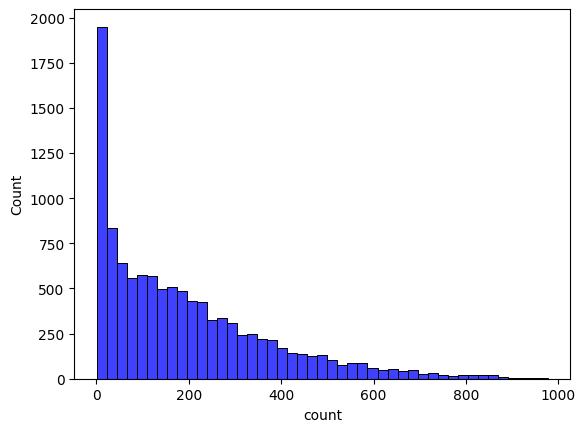

In [ ]:
graph = sns.histplot(train['count'], color='b')
#count0에 굉장히 많이 치우쳐져 있는 것을 확인 할 수 있다. 따라스 log scaling을 통해 정규화 해준다.

In [ ]:
print('왜도(skewness): {0}, 첨도(kurtosis) :{1}'.format(train['count'].skew(), train['count'].kurt()))

왜도(skewness): 1.2420662117180776, 첨도(kurtosis) :1.3000929518398334


In [ ]:
import numpy as np
train['count_log'] = train['count'].map(lambda i : np.log(i) if i>0 else 0)

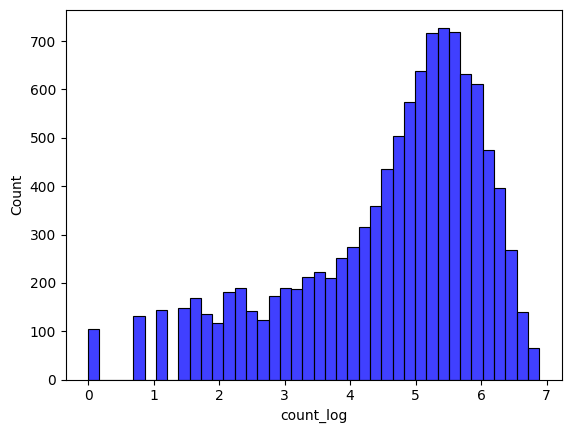

In [ ]:
graph = sns.histplot(train['count_log'], color='b')

In [ ]:
print('왜도(skewness): %f' %train['count_log'].skew())
print('첨도(kurtosis): %f' %train['count_log'].kurt())
# 왜도와 첨도 수치도 괜찮게 나왔고, 데이터가 0하나에만 치우쳐져있는 것이 개선된 것을 확인할 수 있다.
# 따라서 count_log 값을 예측에 활용할 수 있고, 나중에 다시 log를 취해준다.

왜도(skewness): -0.971228
첨도(kurtosis): 0.246622


## one-hot encoding 범주형 변수 처리

In [ ]:
# 케라스(Keras)의 to_categorical() 함수는 정수형(integer) 클래스 레이블(label)을
# 원-핫 인코딩(one-hot encoding) 벡터로 변환하는 함수입니다.
# (단, 음수값을 클래스 레이블로 가지고 있으면 오류가 나기 때문에
# to_categorical 함수를 사용하기 전에 클래스 레이블을 확인하고 음수 값이 없는지 확인하는 것이 좋습니다.)
# 기본적으로 num_classes=None 매개 변수를 가지고 있습니다. 이 매개 변수는 명시적으로 지정하지 않는 한 자동으로 유추됩니다.
train= pd.get_dummies(train, columns=['weather'], prefix='weather')
train = pd.get_dummies(train, columns=['holiday'], prefix='holiday')
train = pd.get_dummies(train, columns=['workingday'], prefix='workingday')
train= pd.get_dummies(train, columns=['season'], prefix='season')
train= pd.get_dummies(train, columns=['year'], prefix='year')
#prefix 뒤에 붙는 단어가 실제 기존 값
#get_dummies 함수 사용시, 여러 컬럼을 인자로 넣으면 여러 변수 한꺼번에 진행할 수 있다. 단, #drop_first=True 쓰는 법도 배우면 변수의 수를 줄일 수 있다. ex) 카테고리 3개이면 변수 2개만 추가 생성.


# 원-핫 인코딩
# cat_var = ["weather","holiday", "workingday", "season", "year"]
# df_new_dummy = pd.get_dummies(train, columns = cat_var)

In [ ]:
train.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,...,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4,year_2011,year_2012
0,2011-01-01 00:00:00,9.84,14.395,81,0.0,3,13,16,1,0,...,1,0,1,0,1,0,0,0,1,0
1,2011-01-01 01:00:00,9.02,13.635,80,0.0,8,32,40,1,1,...,1,0,1,0,1,0,0,0,1,0
2,2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27,32,1,2,...,1,0,1,0,1,0,0,0,1,0
3,2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10,13,1,3,...,1,0,1,0,1,0,0,0,1,0
4,2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1,1,1,4,...,1,0,1,0,1,0,0,0,1,0


## 변수 선택

In [ ]:
#숫자형 변수에서 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_temp = train[['temp', 'atemp','humidity', 'windspeed', 'casual', 'registered']]
vif = pd.DataFrame()
vif["vif_factor"] = [variance_inflation_factor(train_temp.values, i) for i in range(train_temp.shape[1])]
vif["feature"] = train_temp.columns
vif

,vif_factor,feature
0,263.800020,temp
1,289.645640,atemp
2,6.771011,humidity
3,2.790260,windspeed
4,2.561952,casual
5,2.758319,registered


In [ ]:
#temp와 atemp의 다중공선성이 매우 높기 때문에 하나를 지워주며,
#year, month, day, hour 값이 들어갔으므로 datetime 도 지워준다.
#더불어 registered와 casual을 덧셈을 통해 종속변수를 구할 수 있으므로 종속변수 유사한 컬럼을 참조할 수 있다고 판단하여 두 컬럼도 제외하였다.
train = train.drop(['datetime', 'atemp','registered', 'casual'],axis=1)

In [ ]:
train.shape
#21개의 변수로 많아보이긴 하지만 숫자형 변수는 6개이고 나머지는 범주형변수가 원핫인코딩한 정보들이다.

(10886, 22)

In [ ]:
train.columns

Index(['temp', 'humidity', 'windspeed', 'count', 'month', 'hour', 'dayofweek',
       'count_log', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1', 'season_1',
       'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012'],
      dtype='object')

In [ ]:
train.describe()

,temp,humidity,windspeed,count,month,hour,dayofweek,count_log,weather_1,weather_2,...,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4,year_2011,year_2012
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,61.886460,12.799395,191.574132,6.521495,11.541613,3.013963,4.552561,0.660665,0.260334,...,0.971431,0.028569,0.319125,0.680875,0.246739,0.251056,0.251056,0.251148,0.498071,0.501929
std,7.79159,19.245033,8.164537,181.144454,3.444373,6.915838,2.004585,1.489043,0.473505,0.438837,...,0.166599,0.166599,0.466159,0.466159,0.431133,0.433641,0.433641,0.433694,0.500019,0.500019
min,0.82000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.94000,47.000000,7.001500,42.000000,4.000000,6.000000,1.000000,3.737670,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.50000,62.000000,12.998000,145.000000,7.000000,12.000000,3.000000,4.976734,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,26.24000,77.000000,16.997900,284.000000,10.000000,18.000000,5.000000,5.648974,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.00000,100.000000,56.996900,977.000000,12.000000,23.000000,6.000000,6.884487,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### test데이터도 train과 동일한 함수들 적용

In [ ]:
test['datetime'] = pd.to_datetime(test['datetime'])
#test = test.astype({'season':str, 'holiday':str,'workingday':str,'weather': str})
#  숫자형을 문자형으로 변환 후 원핫인코딩하나, 변환 안하고 원핫인코딩하나 나중에 생성되는 컬럼은 동일하네.
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test= pd.get_dummies(test, columns=['weather'], prefix='weather')
test = pd.get_dummies(test, columns=['holiday'], prefix='holiday')
test = pd.get_dummies(test, columns=['workingday'], prefix='workingday')
test= pd.get_dummies(test, columns=['season'], prefix='season')
test= pd.get_dummies(test, columns=['year'], prefix='year')
test = test.drop(['datetime', 'atemp'],axis=1)

In [ ]:
test.columns

Index(['temp', 'humidity', 'windspeed', 'month', 'hour', 'dayofweek',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'season_1', 'season_2',
       'season_3', 'season_4', 'year_2011', 'year_2012'],
      dtype='object')

## 모델 학습
- 하나 꿀Tip, 여러 모델을 가져와 평가할 때 평가지표를 함수로 만들면 사용이 편리함.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train = train.drop(['count_log', 'count'],axis=1)
y_train = train['count']

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train.select_dtypes("float64")

,temp,windspeed
2815,27.88,6.0032
8695,36.90,19.9995
8406,32.80,16.9979
1543,14.76,7.0015
4952,13.12,16.9979
...,...,...
5734,6.56,11.0014
5191,11.48,19.0012
5390,11.48,16.9979
860,15.58,35.0008


In [ ]:
x_train.select_dtypes("int64")
#standard scaler 써도 좋긴 하지만 숫자형 변수 6가지 중
# month, hour, dayofweek은 라벨링 인코더값과 유사하고(모든 문자는 숫자형으로 변환)
#나머지 temp, wiindspeed, humidity 의 단위가 100을 초과하지 않으므로 스케일러를 적용하지 않겠다.

### Q. 스케일러 적용시 시,간, 초 같은 변수는 어떻게 처리하는 걸까 의문. 범주형같으면서도 순서의미는 지님.7다음8.
### 1) get_dummies 나 Labelencoder 하고 변수를 선택하는 방법을 취하거나 2) EDA만 하고 넣지 않는 레퍼런스도 있다고 함.
### 정석은 스케일러는 무조건적으로 수치형연속형일 때만 사용하는 것이 좋

,humidity,month,hour,dayofweek
2815,83,7,5,2
8695,39,8,16,5
8406,41,7,15,2
1543,93,4,4,6
4952,45,11,10,5
...,...,...,...,...
5734,47,1,2,5
5191,61,12,9,5
5390,48,12,16,6
860,17,2,7,5


### elasticnet

In [ ]:
from sklearn.linear_model import ElasticNet

ela=ElasticNet(alpha=10)
ela.fit(x_train, y_train)
pred_ela = ela.predict(x_val)

In [ ]:
pred_ela

array([281.54533846,  39.05695791, 223.48799726, ..., 257.46737986,
        20.20667735, 210.89044784])

In [ ]:
# count_log를 예측하도록 했다면 다시 log 역수를 취해 원래의 값을 찾아준다.
# np.exp(pred_ela)

array([ 97.76413003,  99.35802942, 117.02342548, ..., 124.00256718,
        72.75012973,  84.86972396])

In [ ]:
ela.score(x_train ,y_train)

0.33743170401359257

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_val, pred_ela)
mse = mean_squared_error(y_val, pred_ela)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred_ela)
acc = ela.score(x_val, y_val)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  107.31783
MSE:  21560.37057
RMSE:  146.83450
R2:  0.34679
ACC:  34.67927


### lightgbm

In [ ]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(x_train, y_train)

LGBMRegressor()

In [ ]:
pred_lgbm = lgbm.predict(x_val)

In [ ]:
lgbm.score(x_train ,y_train)

0.9679054554211962

In [ ]:
pred_lgbm

array([136.42789991,  -9.14970739, 157.56295102, ..., 467.22190776,
         4.50803468, 154.73275811])

In [ ]:
mae = mean_absolute_error(y_val, pred_lgbm)
mse = mean_squared_error(y_val, pred_lgbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred_lgbm)
acc = lgbm.score(x_val, y_val)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  24.07656
MSE:  1406.98364
RMSE:  37.50978
R2:  0.95737
ACC:  95.73731


### DNN sklearn

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver="adam",
                   hidden_layer_sizes=[10,10])
mlp.fit(x_train, y_train)
pred_mlp=mlp.predict(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp.score(x_train ,y_train)

0.5890725690313965

In [ ]:
mae = mean_absolute_error(y_val, pred_mlp)
mse = mean_squared_error(y_val, pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred_mlp)
acc = mlp.score(x_val, y_val)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  81.62086
MSE:  13515.99088
RMSE:  116.25829
R2:  0.59051
ACC:  59.05106


### 소프트보팅

In [ ]:
from sklearn.ensemble import VotingRegressor
## 소프트 보팅
voting_model = VotingRegressor(estimators=[("ela", ela),
                                           ("mlp", mlp),
                                           ("lgbm", lgbm)])

In [ ]:
voting_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('ela', ElasticNet(alpha=10)),
                            ('mlp', MLPRegressor(hidden_layer_sizes=[10, 10])),
                            ('lgbm', LGBMRegressor())])

In [ ]:
## Train 데이터 성능
voting_model.score(x_train, y_train)

#분류
##분류 모델의 score 메서드는 정확도 (accuracy_score) 리턴 #내부적으로 predict 진행

#회귀
## 회귀 모델에서는  R^2 와 같은 결정 계수를 기반. 회귀선이 평균에 비해 얼마나 더 정확한지를 나타냄.
##u = ((y_test - y_예측) ** 2).sum()
##v = ((y_test - y_test.mean()) ** 2).sum()
##점수 = 1 - (u/v)
'''model의 score 는 더 이상 scikit learn에서 지원이 안되는 걸로 알고 있습니다만, 아직도 구동이 되는가 보군요.
score() 보다는 accuracy_score(y_test, y_pred)로 변경을 권장드립니다.'''
#<- 해당 코드는 안쓰는게 좋아보임

0.7656570826726004

In [ ]:
pred_vote = voting_model.predict(x_val)

In [ ]:
mae = mean_absolute_error(y_val, pred_vote)
mse = mean_squared_error(y_val, pred_vote)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred_vote)
acc = voting_model.score(x_val, y_val)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  63.43625
MSE:  7784.11230
RMSE:  88.22762
R2:  0.76417
ACC:  76.41674


In [ ]:
pred_vote

array([215.42178391,  48.61590942, 160.33765234, ..., 390.96298534,
        46.890265  , 227.36295601])

In [ ]:
y_val

3133     127
5786      13
5224     163
8953     233
8054     222
        ... 
1963     351
5807       2
10061    509
5427       5
7588     239
Name: count, Length: 2178, dtype: int64